# Analyzing the Impact of Gel States and Temperature Variations on ATP Concentration

## Background
The dataset originates from an experimental setup designed to measure ATP concentration under various conditions involving incubation times, gel states, and environmental factors (e.g., temperature). This dataset provides a controlled environment to study the effects of these variables on ATP levels across different samples.

## Objectives
1. To explore the relationship between incubation conditions and ATP concentration.

2. To identify patterns in ATP levels under varying gel states (e.g., Live-Gel, Dead-Gel, Gel-Only).

3. To engineer features that can be used for deeper insights.

4. To determine the significance of temperature and gel states on ATP concentration levels.

## Research Questions
a. **How do temperature conditions (incubator vs. 23ºC) influence ATP concentrations in gel samples?**

b. **What is the relationship between incubation time and ATP levels across various gel states?**

c. **Do Live-Gel samples exhibit significantly different ATP levels compared to other gel states?**

d. **What insights can be gained from engineered features like ratios and log-transformed variables?**

e. **Are there any observable patterns or anomalies in ATP concentrations within the experimental setup?**

## Data Description
The dataset used in this analysis is sourced from the ***Data.gov*** website. It contains experimental records measuring ATP concentration under various conditions, including incubation times, gel states, and environmental factors like temperature. Key features include Metric, Sample, Incubation_Time, Unnamed_3, Unnamed_4, Unnamed_5, Live_Gel_Incubator, and Live_Gel_23C. These variables capture measurements for live gel samples and provide insights into how ATP levels vary under different experimental setups.

## Methodology
The analysis wil involve the following key steps:
1. **Exploratory Data Analysis (EDA):** Visualize data distributions, including ATP concentrations under various conditions. Examine correlations between incubation time, gel states, and temperature effects. Handle missing values and standardize numeric features.

2. **Feature Engineering:** Calculate ratios (e.g., Live_Gel_Ratio) and other derived metrics for deeper insights. Apply log transformations to handle skewness in numeric variables.

## Significance
Provides insights into how environmental conditions like temperature and incubation affect ATP concentrations, potentially informing laboratory protocols or experimental designs. Helps identify optimal experimental settings for future studies focusing on gel states and cellular health.

## NON-TECHNICAL CONTENT

## **PRESENTATION**

**Click this[Link](https://docs.google.com/presentation/d/1ZuTlFUI3WVkuOO3rLTGtmfgRA-Nwul6H-GjnuLe9dbQ/edit?usp=sharing)**

## > Open the dataset with the required libraries

In [145]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [146]:
# Open the Incubator dataset
df = pd.read_excel('/Users/mac/Documents/DATA.GOV/INFANT_INCUBATOR.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1,80 minutes incubation time,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,Gel-Only in incubator,Gel-Only at 23ºC,Dead-Gel-Fixed in incubator,Dead-Gel-Fixed at 23ºC,Live-Gel in incubator,Live-Gel at 23ºC
1,ATP Concentration (µM),Sample 1,-0.06177,0.00489,-0.00968,0.05288,1.4557,1.3828
2,NaN,Sample 2,-0.05954,0.00813,0.00914,0.06296,1.56271,1.50234
3,NaN,Sample 3,-0.05911,0.01637,0.0122,0.05641,1.40588,1.56465
4,NaN,Sample 4,-0.06533,0.000268,-0.00106,0.05434,NaN,1.52737


In [147]:
# Check the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  1 non-null      object
 1   Unnamed: 1                  6 non-null      object
 2   80 minutes incubation time  7 non-null      object
 3   Unnamed: 3                  7 non-null      object
 4   Unnamed: 4                  7 non-null      object
 5   Unnamed: 5                  7 non-null      object
 6   Unnamed: 6                  6 non-null      object
 7   Unnamed: 7                  7 non-null      object
dtypes: object(8)
memory usage: 640.0+ bytes


In [148]:
# check the data types of each column
df.dtypes

Unnamed: 0                    object
Unnamed: 1                    object
80 minutes incubation time    object
Unnamed: 3                    object
Unnamed: 4                    object
Unnamed: 5                    object
Unnamed: 6                    object
Unnamed: 7                    object
dtype: object

In [149]:
# Determine the number of rows and columns
df.shape

(8, 8)

## Handling Missing Values

In [150]:
# Get the sum of missing values in the dataset
df.isnull().sum()

Unnamed: 0                    7
Unnamed: 1                    2
80 minutes incubation time    1
Unnamed: 3                    1
Unnamed: 4                    1
Unnamed: 5                    1
Unnamed: 6                    2
Unnamed: 7                    1
dtype: int64

In [151]:
# Determine which column has missing values and the location of the missing values
df.isna()

,Unnamed: 0,Unnamed: 1,80 minutes incubation time,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,True,False
5,True,True,True,True,True,True,True,True
6,True,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False


In [152]:
# Rename columns
df.columns = ['Metric', 'Sample', 'Incubation_Time', 'Unnamed_3', 'Unnamed_4', 'Unnamed_5', 'Live_Gel_Incubator', 'Live_Gel_23C']

# Fill NaN values in the 'Sample' column with a placeholder
df['Sample'].fillna('Unknown', inplace=True)

# Convert columns to appropriate data types if necessary
df['Incubation_Time'] = pd.to_numeric(df['Incubation_Time'], errors='coerce')
df['Unnamed_3'] = pd.to_numeric(df['Unnamed_3'], errors='coerce')
df['Unnamed_4'] = pd.to_numeric(df['Unnamed_4'], errors='coerce')
df['Unnamed_5'] = pd.to_numeric(df['Unnamed_5'], errors='coerce')
df['Live_Gel_Incubator'] = pd.to_numeric(df['Live_Gel_Incubator'], errors='coerce')
df['Live_Gel_23C'] = pd.to_numeric(df['Live_Gel_23C'], errors='coerce')

# Display cleaned data
print(df.head())


                   Metric    Sample  Incubation_Time  Unnamed_3  Unnamed_4  \
0                     NaN   Unknown              NaN        NaN        NaN   
1  ATP Concentration (µM)  Sample 1         -0.06177   0.004890   -0.00968   
2                     NaN  Sample 2         -0.05954   0.008130    0.00914   
3                     NaN  Sample 3         -0.05911   0.016370    0.01220   
4                     NaN  Sample 4         -0.06533   0.000268   -0.00106   

   Unnamed_5  Live_Gel_Incubator  Live_Gel_23C  
0        NaN                 NaN           NaN  
1    0.05288             1.45570       1.38280  
2    0.06296             1.56271       1.50234  
3    0.05641             1.40588       1.56465  
4    0.05434                 NaN       1.52737  


In [153]:
# Rename columns
df.columns = ['Metric', 'Sample', 'Incubation_Time', 'Unnamed_3', 'Unnamed_4', 'Unnamed_5', 'Live_Gel_Incubator', 'Live_Gel_23C']

# Fill NaN values in the 'Sample' column with a placeholder
df['Sample'].fillna('Unknown', inplace=True)

# Fill NaN values in the 'Metric' column with the previous value (forward fill)
df['Metric'].fillna(method='ffill', inplace=True)

# Convert columns to appropriate data types if necessary
df['Incubation_Time'] = pd.to_numeric(df['Incubation_Time'], errors='coerce')
df['Unnamed_3'] = pd.to_numeric(df['Unnamed_3'], errors='coerce')
df['Unnamed_4'] = pd.to_numeric(df['Unnamed_4'], errors='coerce')
df['Unnamed_5'] = pd.to_numeric(df['Unnamed_5'], errors='coerce')
df['Live_Gel_Incubator'] = pd.to_numeric(df['Live_Gel_Incubator'], errors='coerce')
df['Live_Gel_23C'] = pd.to_numeric(df['Live_Gel_23C'], errors='coerce')

# Display cleaned data
print(df.head())


                   Metric    Sample  Incubation_Time  Unnamed_3  Unnamed_4  \
0                     NaN   Unknown              NaN        NaN        NaN   
1  ATP Concentration (µM)  Sample 1         -0.06177   0.004890   -0.00968   
2  ATP Concentration (µM)  Sample 2         -0.05954   0.008130    0.00914   
3  ATP Concentration (µM)  Sample 3         -0.05911   0.016370    0.01220   
4  ATP Concentration (µM)  Sample 4         -0.06533   0.000268   -0.00106   

   Unnamed_5  Live_Gel_Incubator  Live_Gel_23C  
0        NaN                 NaN           NaN  
1    0.05288             1.45570       1.38280  
2    0.06296             1.56271       1.50234  
3    0.05641             1.40588       1.56465  
4    0.05434                 NaN       1.52737  


In [154]:
# Fill remaining NaN values in numeric columns with the mean of the respective columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
# Display cleaned data
print(df.head())

                   Metric    Sample  Incubation_Time  Unnamed_3  Unnamed_4  \
0                     NaN   Unknown        -0.050724   0.007310   0.003873   
1  ATP Concentration (µM)  Sample 1        -0.061770   0.004890  -0.009680   
2  ATP Concentration (µM)  Sample 2        -0.059540   0.008130   0.009140   
3  ATP Concentration (µM)  Sample 3        -0.059110   0.016370   0.012200   
4  ATP Concentration (µM)  Sample 4        -0.065330   0.000268  -0.001060   

   Unnamed_5  Live_Gel_Incubator  Live_Gel_23C  
0   0.047948            1.195837      1.258344  
1   0.052880            1.455700      1.382800  
2   0.062960            1.562710      1.502340  
3   0.056410            1.405880      1.564650  
4   0.054340            1.195837      1.527370  


In [155]:
# Check if the dataset is clean
df.isna()

,Metric,Sample,Incubation_Time,Unnamed_3,Unnamed_4,Unnamed_5,Live_Gel_Incubator,Live_Gel_23C
0,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False


In [156]:
# Reconfirm if the dataset is clean
df.isna().sum()

Metric                1
Sample                0
Incubation_Time       0
Unnamed_3             0
Unnamed_4             0
Unnamed_5             0
Live_Gel_Incubator    0
Live_Gel_23C          0
dtype: int64

In [157]:
# Fill NaN values in the 'Metric' column using forward fill, then backward fill for any remaining NaNs
df['Metric'].fillna(method='ffill', inplace=True)
df['Metric'].fillna(method='bfill', inplace=True)

# Fill remaining NaN values in numeric columns with the mean of the respective columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Display cleaned data
print(df.head())

                   Metric    Sample  Incubation_Time  Unnamed_3  Unnamed_4  \
0  ATP Concentration (µM)   Unknown        -0.050724   0.007310   0.003873   
1  ATP Concentration (µM)  Sample 1        -0.061770   0.004890  -0.009680   
2  ATP Concentration (µM)  Sample 2        -0.059540   0.008130   0.009140   
3  ATP Concentration (µM)  Sample 3        -0.059110   0.016370   0.012200   
4  ATP Concentration (µM)  Sample 4        -0.065330   0.000268  -0.001060   

   Unnamed_5  Live_Gel_Incubator  Live_Gel_23C  
0   0.047948            1.195837      1.258344  
1   0.052880            1.455700      1.382800  
2   0.062960            1.562710      1.502340  
3   0.056410            1.405880      1.564650  
4   0.054340            1.195837      1.527370  


In [158]:
# Check if the dataset was cleaned
df.isna()

,Metric,Sample,Incubation_Time,Unnamed_3,Unnamed_4,Unnamed_5,Live_Gel_Incubator,Live_Gel_23C
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False


## Handling Duplicates

In [159]:
# Check for duplicate rows
duplicates = df.duplicated()

# Display duplicate rows if any
duplicate_rows = df[duplicates]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

Duplicate rows found:
                   Metric   Sample  Incubation_Time  Unnamed_3  Unnamed_4  \
5  ATP Concentration (µM)  Unknown        -0.050724    0.00731   0.003873   

   Unnamed_5  Live_Gel_Incubator  Live_Gel_23C  
5   0.047948            1.195837      1.258344  


In [160]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Display cleaned data
print(df_cleaned.head())

                   Metric    Sample  Incubation_Time  Unnamed_3  Unnamed_4  \
0  ATP Concentration (µM)   Unknown        -0.050724   0.007310   0.003873   
1  ATP Concentration (µM)  Sample 1        -0.061770   0.004890  -0.009680   
2  ATP Concentration (µM)  Sample 2        -0.059540   0.008130   0.009140   
3  ATP Concentration (µM)  Sample 3        -0.059110   0.016370   0.012200   
4  ATP Concentration (µM)  Sample 4        -0.065330   0.000268  -0.001060   

   Unnamed_5  Live_Gel_Incubator  Live_Gel_23C  
0   0.047948            1.195837      1.258344  
1   0.052880            1.455700      1.382800  
2   0.062960            1.562710      1.502340  
3   0.056410            1.405880      1.564650  
4   0.054340            1.195837      1.527370  


In [161]:
# Original number of rows
original_rows = df.shape[0]

# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Number of rows after removing duplicates
cleaned_rows = df_cleaned.shape[0]

# Check if duplicates were removed
if original_rows == cleaned_rows:
    print("No duplicates were found or removed.")
else:
    print(f"Duplicates were removed. Original rows: {original_rows}, Cleaned rows: {cleaned_rows}")

Duplicates were removed. Original rows: 8, Cleaned rows: 7


## Perform Exploratory Data Analysis (EDA)

In [162]:
# Get the summary satistics of the dataset
df.describe()

,Incubation_Time,Unnamed_3,Unnamed_4,Unnamed_5,Live_Gel_Incubator,Live_Gel_23C
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,-0.050724,0.007310,0.003873,0.047948,1.195837,1.258344
std,0.022258,0.004448,0.007010,0.018244,0.473412,0.491159
min,-0.065330,0.000268,-0.009680,0.004451,0.080134,0.078612
25%,-0.061521,0.006312,0.001723,0.047948,1.195837,1.258344
50%,-0.059325,0.007310,0.003873,0.053610,1.300859,1.438545
75%,-0.050724,0.007593,0.009351,0.056469,1.460466,1.508598
max,0.002845,0.016370,0.012200,0.062960,1.562710,1.564650


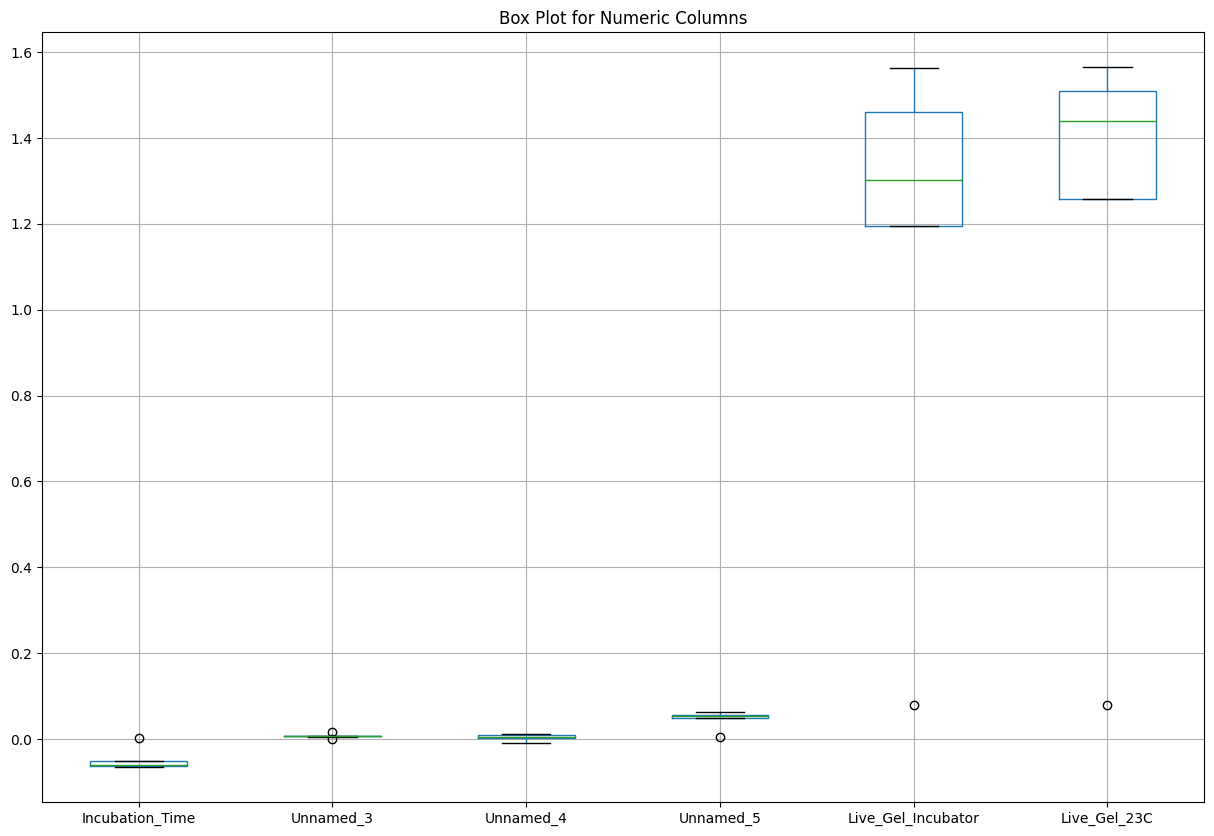

In [163]:
# Create box plots for numeric columns
plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot()
plt.title("Box Plot for Numeric Columns")
plt.show()

## Handling Outliers

In [164]:
# Calculate Q1, Q3, and IQR for specific numeric columns (e.g., 'Incubation_Time' and 'Unnamed_3')
for col in ['Incubation_Time', 'Unnamed_3']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Display cleaned data without outliers for specified columns
print(df)

                   Metric    Sample  Incubation_Time  Unnamed_3  Unnamed_4  \
0  ATP Concentration (µM)   Unknown        -0.050724   0.007310   0.003873   
1  ATP Concentration (µM)  Sample 1        -0.061770   0.004890  -0.009680   
2  ATP Concentration (µM)  Sample 2        -0.059540   0.008130   0.009140   
5  ATP Concentration (µM)   Unknown        -0.050724   0.007310   0.003873   
6  ATP Concentration (µM)   Average        -0.061437   0.007414   0.002650   

   Unnamed_5  Live_Gel_Incubator  Live_Gel_23C  
0   0.047948            1.195837      1.258344  
1   0.052880            1.455700      1.382800  
2   0.062960            1.562710      1.502340  
5   0.047948            1.195837      1.258344  
6   0.056648            1.474763      1.494290  


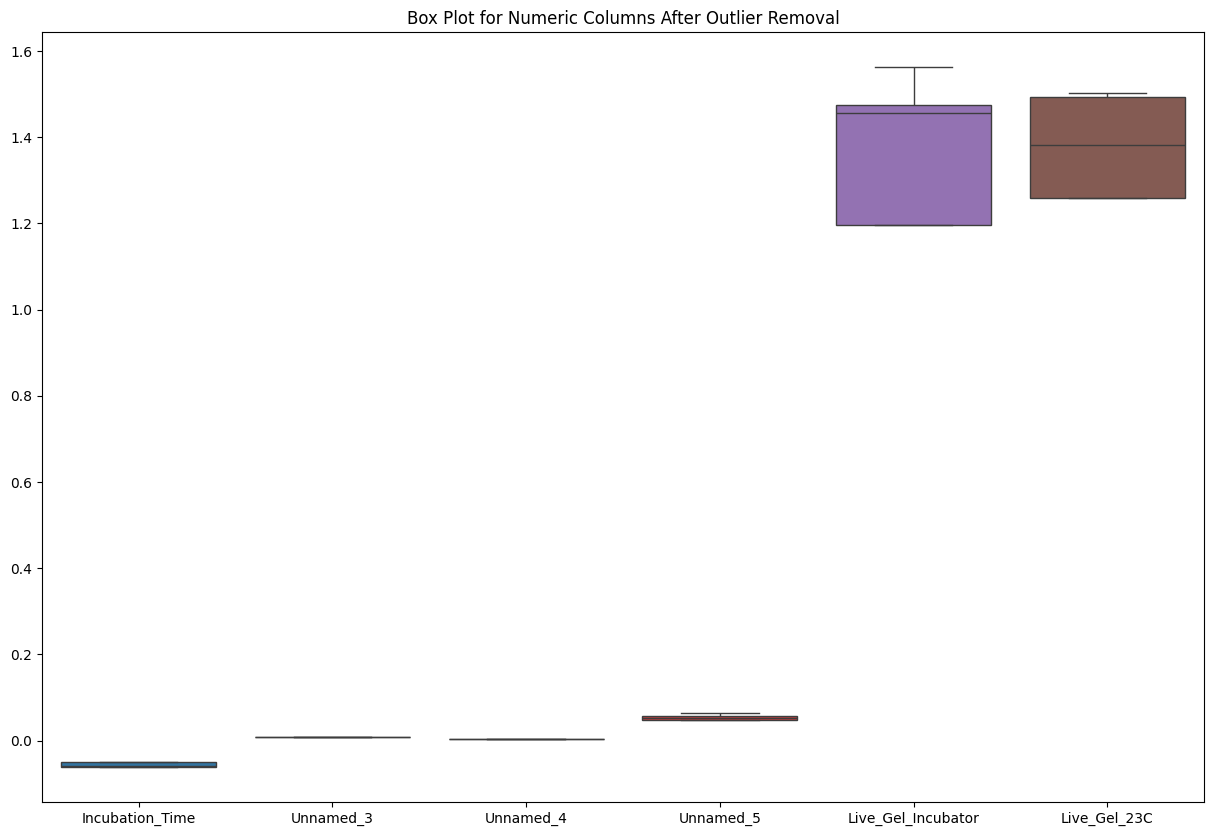

In [165]:
# Create box plots for numeric columns to visualize outliers removal
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_cols], showfliers=False)
plt.title("Box Plot for Numeric Columns After Outlier Removal")
plt.show()

## To check if the outliers were removed

In [166]:
# Recheck the number of rows and columns
df_cleaned.shape

(7, 8)

In [167]:
df_cleaned.head()

,Metric,Sample,Incubation_Time,Unnamed_3,Unnamed_4,Unnamed_5,Live_Gel_Incubator,Live_Gel_23C
0,ATP Concentration (µM),Unknown,-0.050724,0.007310,0.003873,0.047948,1.195837,1.258344
1,ATP Concentration (µM),Sample 1,-0.061770,0.004890,-0.009680,0.052880,1.455700,1.382800
2,ATP Concentration (µM),Sample 2,-0.059540,0.008130,0.009140,0.062960,1.562710,1.502340
3,ATP Concentration (µM),Sample 3,-0.059110,0.016370,0.012200,0.056410,1.405880,1.564650
4,ATP Concentration (µM),Sample 4,-0.065330,0.000268,-0.001060,0.054340,1.195837,1.527370


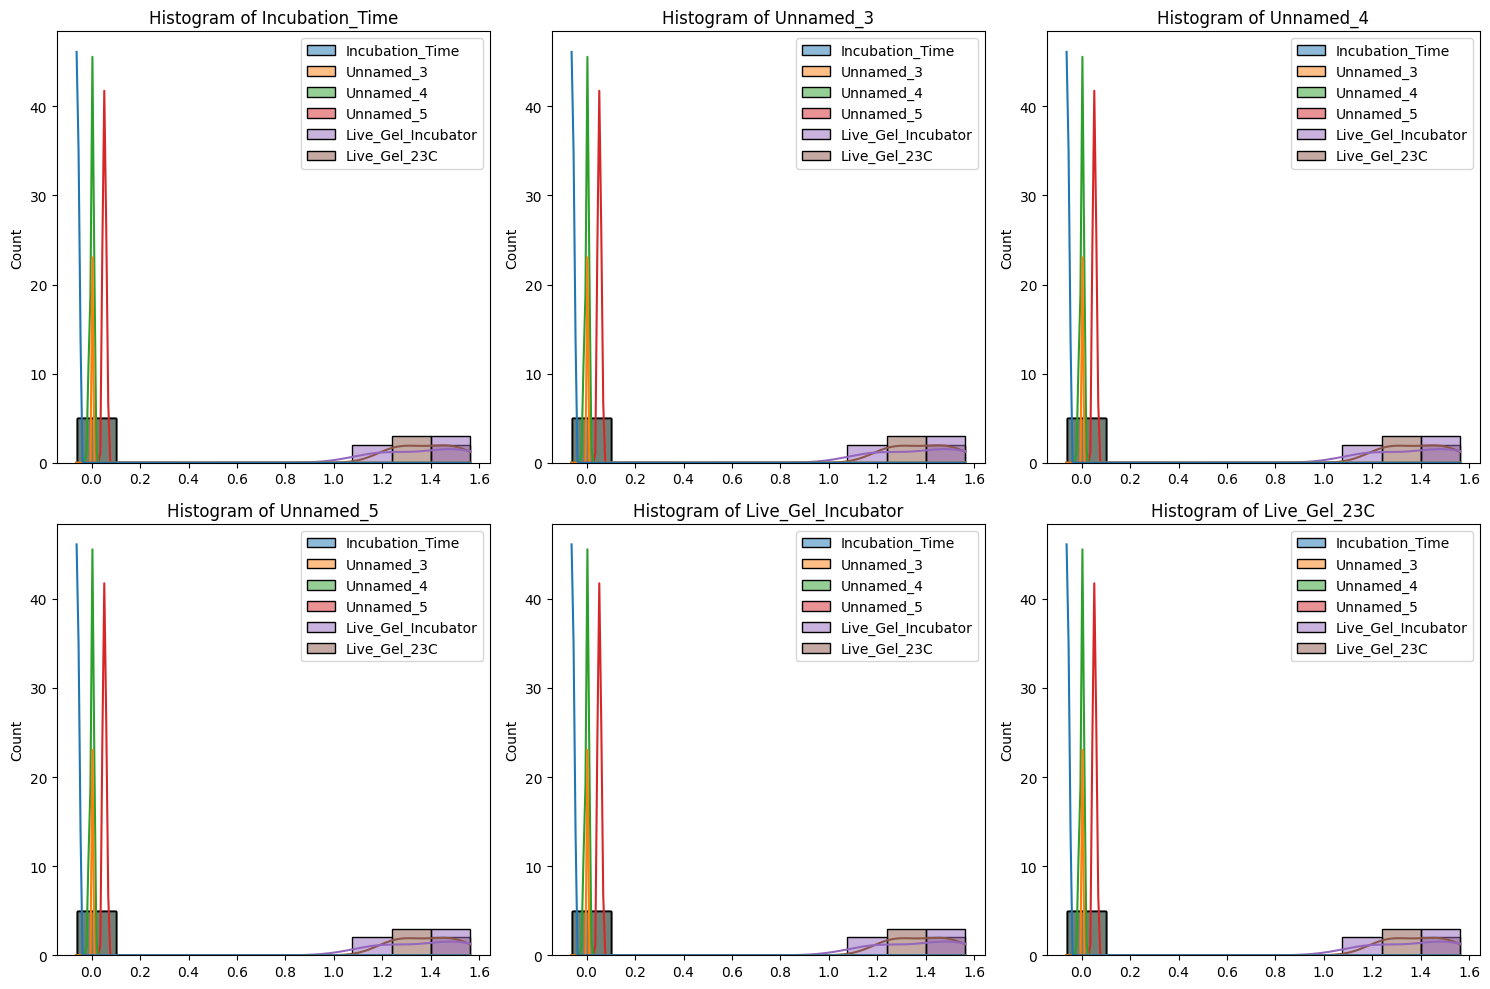

In [168]:
# List of columns to visualize
columns = ['Incubation_Time', 'Unnamed_3', 'Unnamed_4', 'Unnamed_5', 'Live_Gel_Incubator', 'Live_Gel_23C']

# Create histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df[numeric_cols], kde=True, bins=10)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

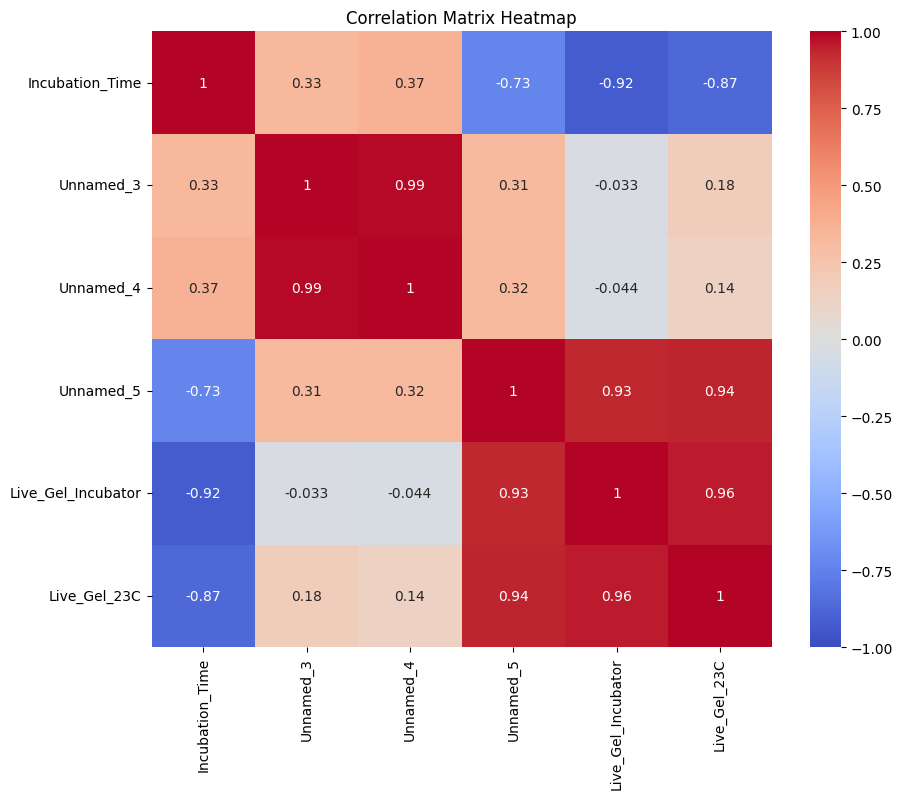

In [169]:
# Correlation matrix
corr_matrix = data=df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

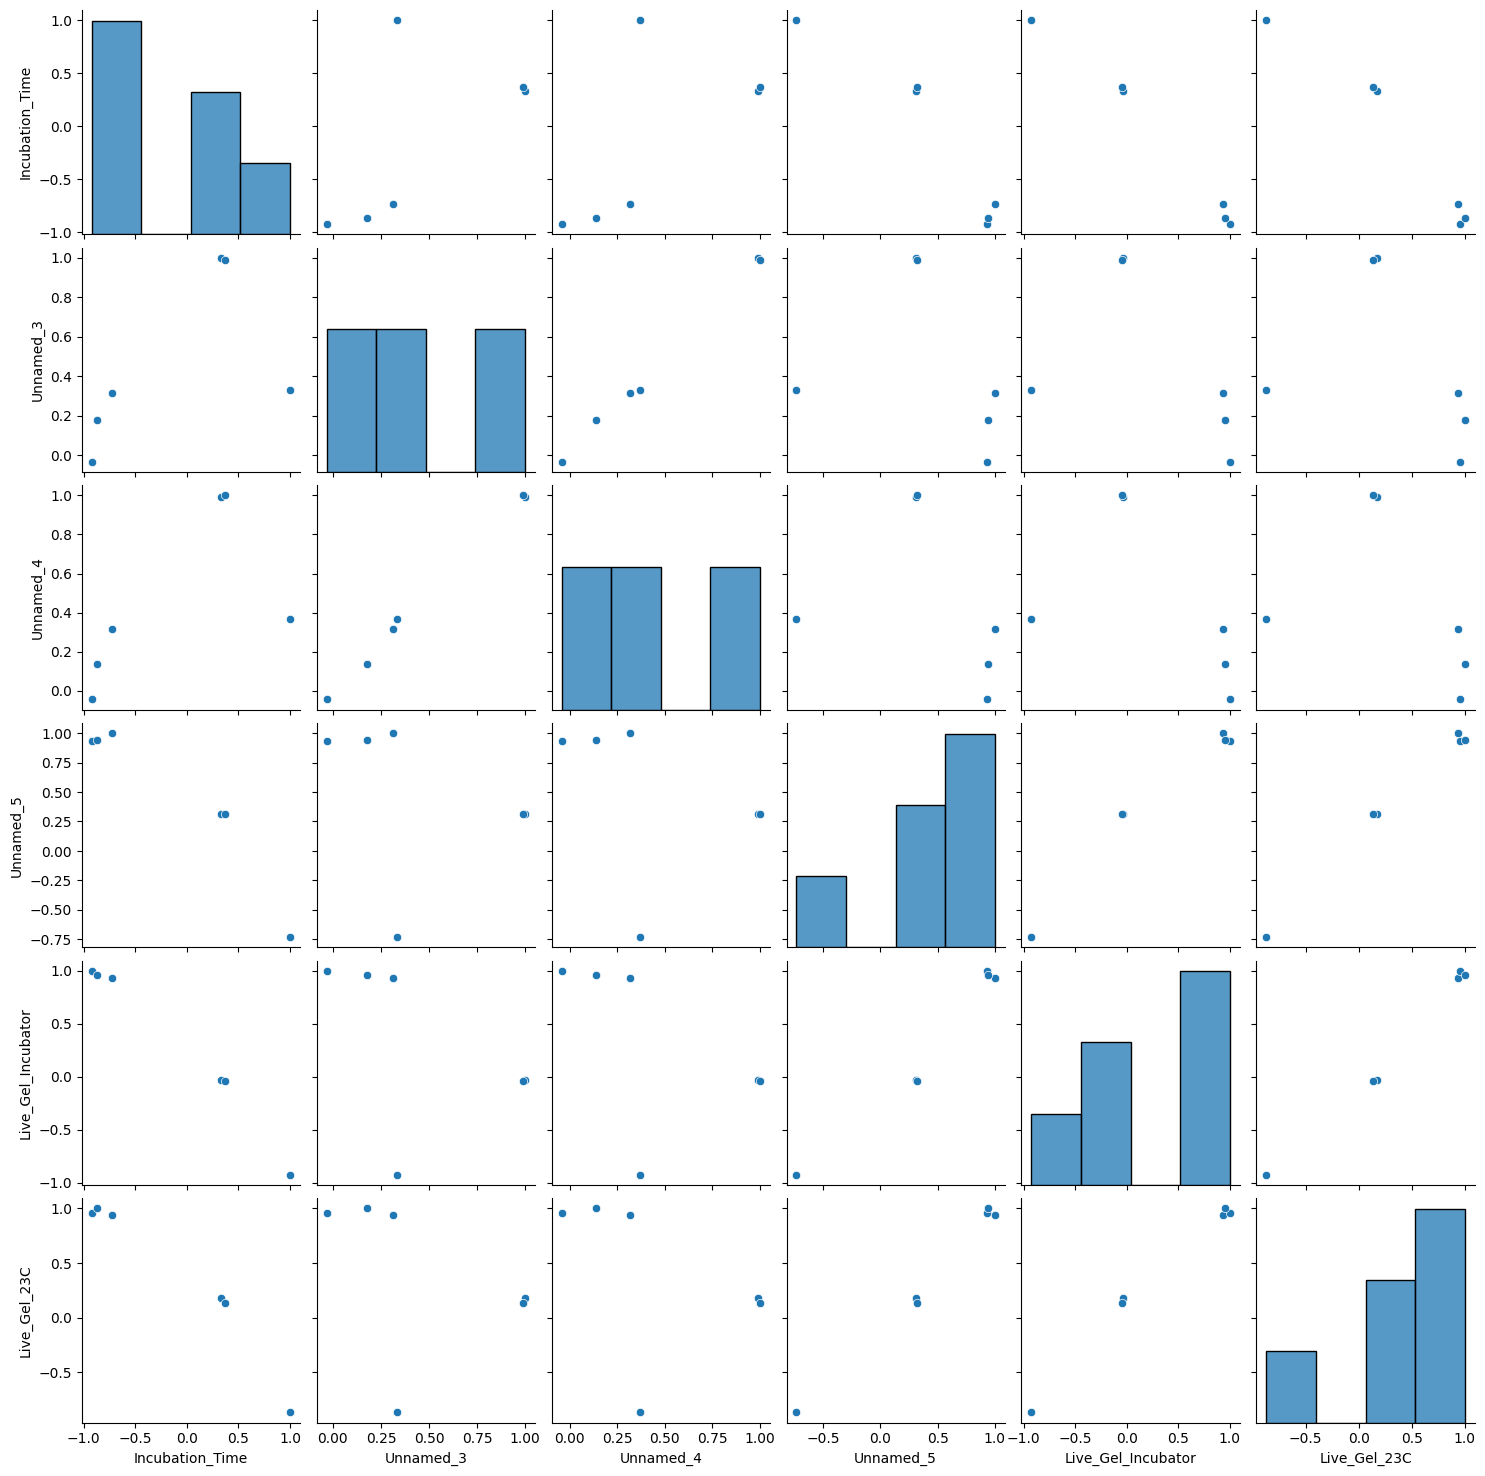

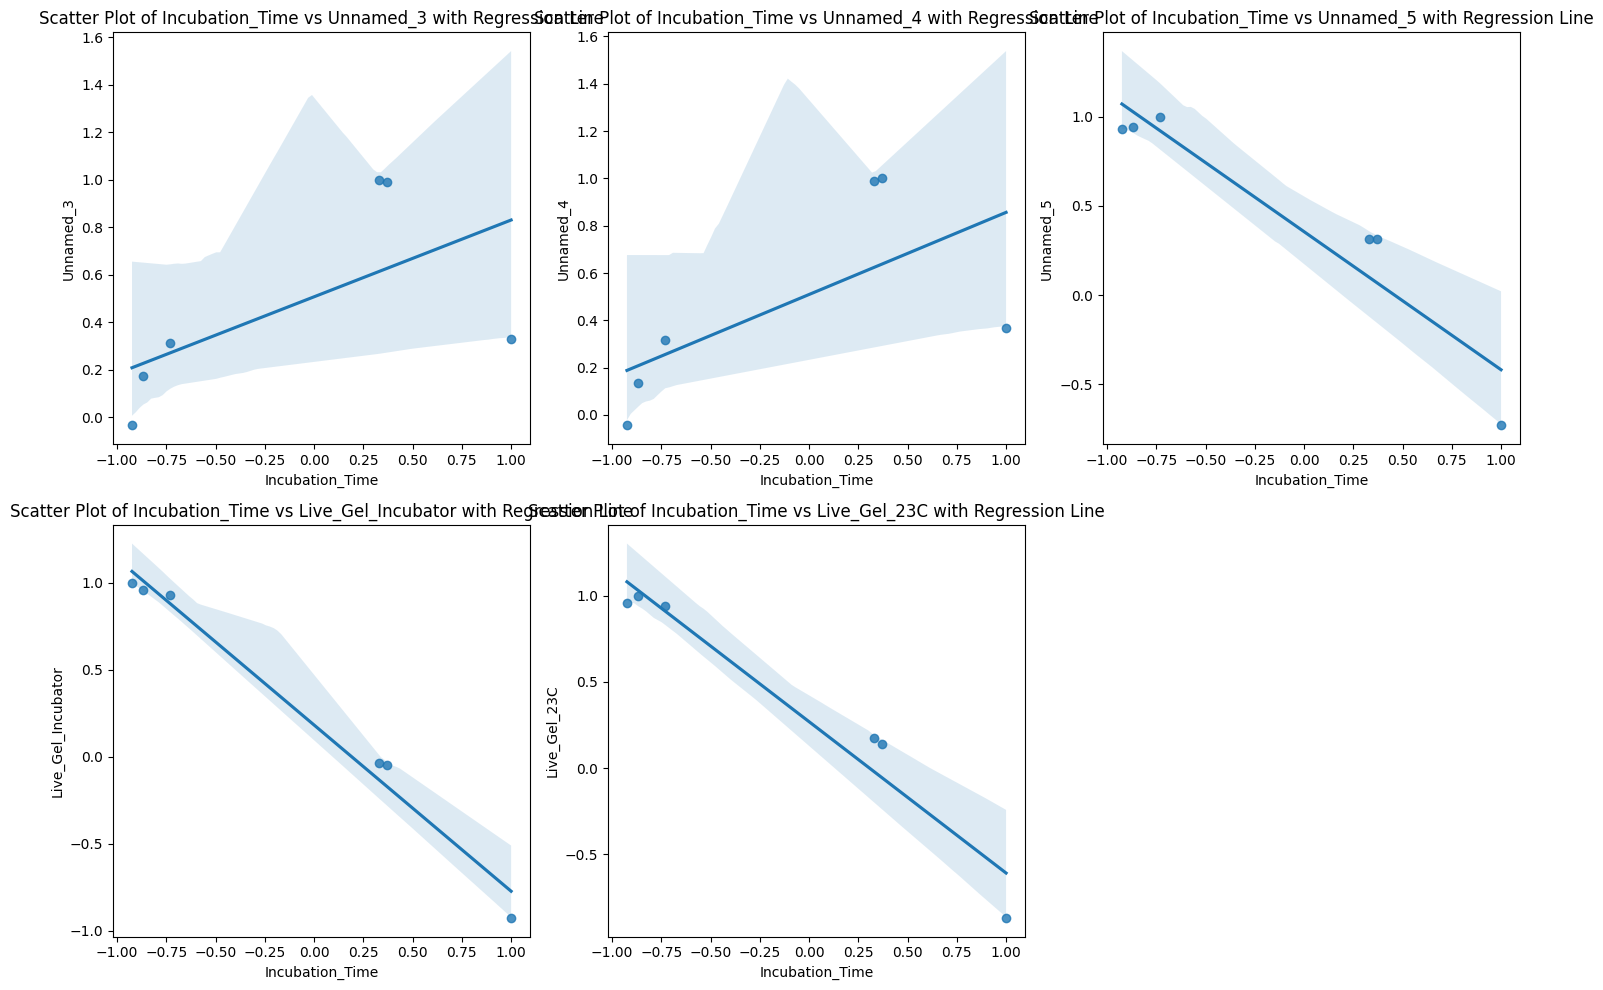

In [170]:
# Pair plots
sns.pairplot(data[columns])
plt.show()

# Scatter plots with regression lines
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns[1:], 1):  # Skipping the first column as it's already plotted
    plt.subplot(2, 3, i)
    sns.regplot(x=data['Incubation_Time'], y=data[column])
    plt.title(f'Scatter Plot of Incubation_Time vs {column} with Regression Line')
plt.tight_layout()
plt.show()

## Feature Engineering
## **1. Create new features by calculating ratios**
   

In [171]:
# Calculate Live_Gel_Ratio
df_cleaned['Live_Gel_Ratio'] = df_cleaned['Live_Gel_23C'] / df_cleaned['Live_Gel_Incubator']
print(df_cleaned['Live_Gel_Ratio'])

0    1.052270
1    0.949921
2    0.961368
3    1.112933
4    1.277239
6    1.013241
7    0.981008
Name: Live_Gel_Ratio, dtype: float64


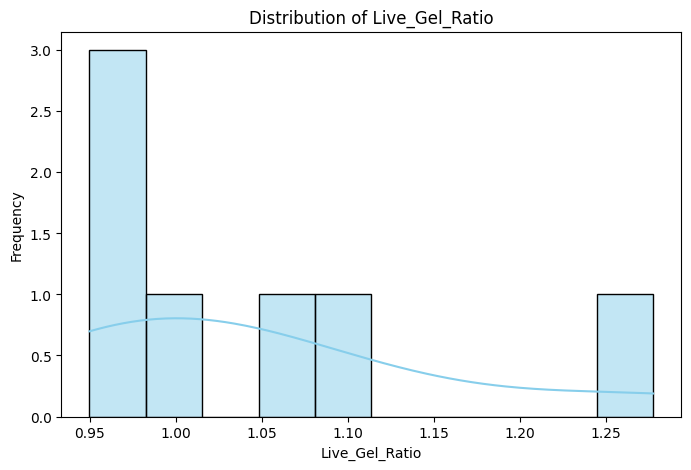

In [172]:
# Plot the distribution of Live_Gel_Ratio
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Live_Gel_Ratio'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Live_Gel_Ratio')
plt.xlabel('Live_Gel_Ratio')
plt.ylabel('Frequency')
plt.show()

In [173]:
# Calculate additional ratios involving Unnamed_5
df_cleaned['Unnamed_5_to_Incubator'] = df_cleaned['Unnamed_5'] / df_cleaned['Live_Gel_Incubator']
print(df_cleaned['Unnamed_5_to_Incubator'])

0    0.040096
1    0.036326
2    0.040289
3    0.040124
4    0.045441
6    0.038411
7    0.055539
Name: Unnamed_5_to_Incubator, dtype: float64


In [174]:
# Calculate additional ratios involving Unnamed_5
df_cleaned['Unnamed_5_to_23C'] = df_cleaned['Unnamed_5'] / df_cleaned['Live_Gel_23C']
print(df_cleaned['Unnamed_5_to_23C'])

0    0.038104
1    0.038241
2    0.041908
3    0.036053
4    0.035577
6    0.037909
7    0.056614
Name: Unnamed_5_to_23C, dtype: float64


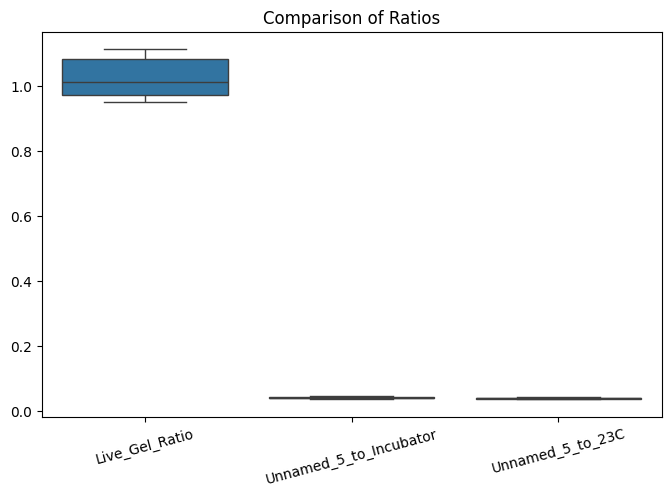

In [175]:
# Boxplot to compare ratios
plt.figure(figsize=(8, 5),)
sns.boxplot(data=df_cleaned[['Live_Gel_Ratio', 'Unnamed_5_to_Incubator', 'Unnamed_5_to_23C']], showfliers=False)
plt.title('Comparison of Ratios')
plt.xticks(rotation=15)
plt.show()

## **2. Perform Log Transformations**

In [176]:
# Apply log transformation to Live_Gel_Incubator
df_cleaned['Log_Live_Gel_Incubator'] = np.log(df_cleaned['Live_Gel_Incubator'])

# Apply log transformation to Live_Gel_23C (if needed)
df_cleaned['Log_Live_Gel_23C'] = np.log(df_cleaned['Live_Gel_23C'])

# Display the transformed columns
print(df_cleaned[['Log_Live_Gel_Incubator', 'Log_Live_Gel_23C']])


   Log_Live_Gel_Incubator  Log_Live_Gel_23C
0                0.178847          0.229796
1                0.375487          0.324110
2                0.446421          0.407024
3                0.340663          0.447662
4                0.178847          0.423547
6                0.388498          0.401651
7               -2.524054         -2.543228


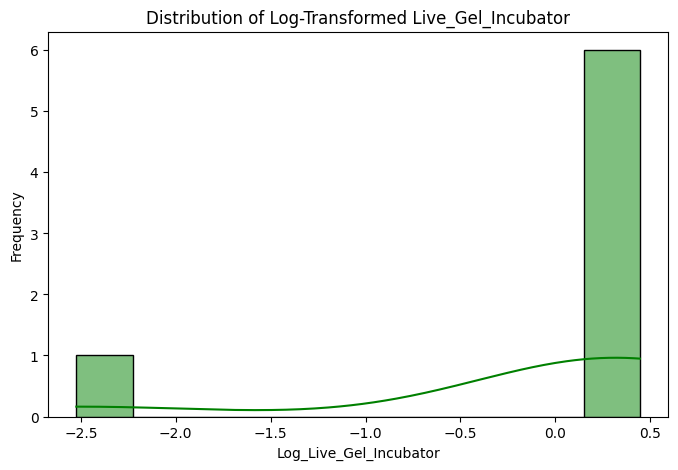

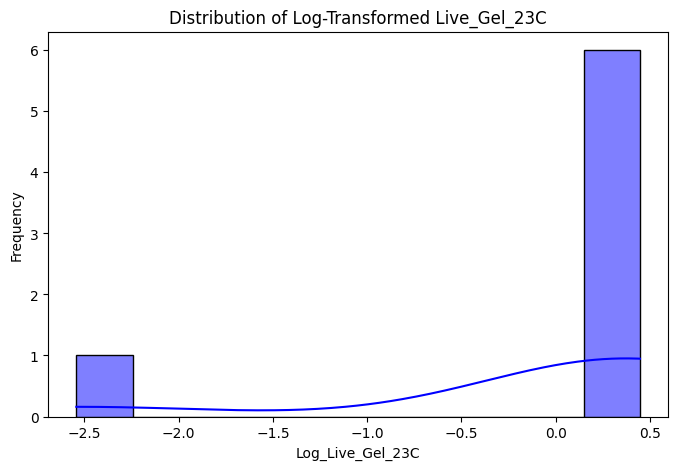

In [177]:
# Histogram for Log_Live_Gel_Incubator
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Log_Live_Gel_Incubator'], bins=10, kde=True, color='green')
plt.title('Distribution of Log-Transformed Live_Gel_Incubator')
plt.xlabel('Log_Live_Gel_Incubator')
plt.ylabel('Frequency')
plt.show()

# Histogram for Log_Live_Gel_23C
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Log_Live_Gel_23C'], bins=10, kde=True, color='blue')
plt.title('Distribution of Log-Transformed Live_Gel_23C')
plt.xlabel('Log_Live_Gel_23C')
plt.ylabel('Frequency')
plt.show()

## Summary of Key Findings
1. **ATP Concentration Trends:** The analysis revealed noticeable variations in ATP concentrations under different gel states (e.g., Live-Gel, Dead-Gel) and temperature conditions (incubator vs. 23ºC).

2. **Effect of Temperature:** Samples measured at 23ºC showed consistent patterns, with notable differences compared to incubator measurements, especially for Live-Gel samples.

3. **Feature Ratios:** Derived metrics, like Live_Gel_Ratio, provided deeper insights into the relative changes in ATP levels across experimental setups.

4. **Log Transformations:** Applying log transformations to variables like Live_Gel_Incubator reduced skewness, enabling better representation of the data for analysis

## Implications
The findings can guide experimental designs by highlighting the significance of temperature and gel states on metabolic activity, as reflected by ATP concentrations. Understanding these patterns may help researchers optimize incubation conditions for experiments that require precise metabolic measurements. The generated features, such as ratios and log-transformed variables, can serve as predictors in future modeling efforts, potentially improving accuracy.

## Limitations
Missing and placeholder values (e.g., Unnamed_3, Unnamed_4) may limit the completeness of the analysis. The dataset is focused on specific experimental conditions and may not generalize to broader biological contexts or other environments.

## Future Work
Include more samples and experimental conditions to generalize findings.

Use engineered features to build machine learning models predicting ATP concentrations under new conditions.

Develop metrics tailored to specific biological or experimental goals, such as energy efficiency indicators.

Conduct hypothesis testing to evaluate the significance of differences between conditions.

In [178]:
# Re-check the cleaned dataset
df_cleaned

,Metric,Sample,Incubation_Time,Unnamed_3,Unnamed_4,Unnamed_5,Live_Gel_Incubator,Live_Gel_23C,Live_Gel_Ratio,Unnamed_5_to_Incubator,Unnamed_5_to_23C,Log_Live_Gel_Incubator,Log_Live_Gel_23C
0,ATP Concentration (µM),Unknown,-0.050724,0.007310,0.003873,0.047948,1.195837,1.258344,1.052270,0.040096,0.038104,0.178847,0.229796
1,ATP Concentration (µM),Sample 1,-0.061770,0.004890,-0.009680,0.052880,1.455700,1.382800,0.949921,0.036326,0.038241,0.375487,0.324110
2,ATP Concentration (µM),Sample 2,-0.059540,0.008130,0.009140,0.062960,1.562710,1.502340,0.961368,0.040289,0.041908,0.446421,0.407024
3,ATP Concentration (µM),Sample 3,-0.059110,0.016370,0.012200,0.056410,1.405880,1.564650,1.112933,0.040124,0.036053,0.340663,0.447662
4,ATP Concentration (µM),Sample 4,-0.065330,0.000268,-0.001060,0.054340,1.195837,1.527370,1.277239,0.045441,0.035577,0.178847,0.423547
6,ATP Concentration (µM),Average,-0.061437,0.007414,0.002650,0.056648,1.474763,1.494290,1.013241,0.038411,0.037909,0.388498,0.401651
7,ATP Concentration (µM),S.D.,0.002845,0.006786,0.009985,0.004451,0.080134,0.078612,0.981008,0.055539,0.056614,-2.524054,-2.543228


## References

## ***https://catalog.data.gov/dataset?q=medical+engineering***

In [179]:
# Save the dataframe as an excel file
df_cleaned.to_excel('Infant_Incubator.xlsx', index=False)

print("Data saved successfully as Infant_Incubator.xlsx")

Data saved successfully as Infant_Incubator.xlsx
